# Den Diskrete Fouriertransformasjonen med Anvendingar

## Innhaldsfortegning
* [Introduksjon](#first-bullet)
* [Prøver og prøvingsrate](#second-bullet)
* [Eit ekte lydsignal](#4-bullet)
* [Den diskrete fouriertransformasjonen](#5-bullet)
* [Invers DFT](#6-bullet)
* [Syklisk konvolusjon](#7-bullet)
* [Høg- og lågpassfilter](#8-bullet)
* [Løysing på test deg sjølv](#9-bullet)

# Introduksjon <a class="anchor" id="first-bullet"></a>

I denne leksjonen skal vi lære korleis vi kan finne ein tilnærming til fouriertransformasjonen på datamaskinen. Dette gjer at vi kan finne frekvensane og manipulere til eit digitaltsignal. Å kunne gjere dette raskt er eit av dei viktigaste framstega i moderne mattematikk, og det finnes fleire anvendingar for dette. I dette notatet kjem vi til å ta føre oss eit av døma; nemleg _høg-_ og _lågpassfiltrer_. Desse filtra lar berre høge eller låge frekvensar "passere", med andre ord eit høgpassfilter fjernar de låge frekvensane.

For å gjere dette treng vi naturleg nokk eit signal å jobbe med. I dette notatet kjem vi til å bruke to lydsignal frå ein gitar. Dei to lydsignala kjem frå å slå 
- den øvste E-strengen på gitaren og
- eit G-grep på gitaren.

Den første lydfila kjem naturleg nokk til å innehalde ein E-tone med frekvens $82,41$Hz og andre E-tonar, mens eit G-grep inneheld fleire G-tonar (samt andre tonar) som har frekvens enten $98,00$Hz, $196,00$Hz and $392,00$Hz.

Men før vi gjer dette treng vi nokre omgrep.

## Prøver og prøvingsrate <a class="anchor" id="second-bullet"></a>

Ein mikrofon fungerer ved at den tar _prøver_ eller _punktprøver_ (eng. samples) av lufttrykket ved gitte intervall. Det vil sei at mikrofonen berre måler trykket i visse tidspunkt. Prosessen å ta slike prøver heitar _prøvetaking_ (eng. sampling). Vi kan representere desse prøvene som ein vektor, kor kvar prøve som er tatt er eit element i vektoren. Til dømes om vi gjer tre prøver på lufttrykket som er 1, 1.2 og -1.2 rett etter kvarandre, vil vektoren som representerer dei være $\vec{v}=(1,1.2, -1.2)$. Vi kjem også til å representere den $n$'te punktprøva som $\vec{v}[n]$. Det vil sei at til dømes $\vec{v}[0]=1$, $\vec{v}[1]=1.2$ og $\vec{v}[0]=-1.2$.

Kor mange gonger dette skjer per tidseining heiter _prøvingsraten_ eller _prøvefrekvensen_ (eng. sampling rate eller sampling frequency). Som regel oppgjer vi prøvingsraten i Hz, det vil sei kor mange punktprøver ein tek kvart sekund. Vi kan i staden ønsker å oppgje tida mellom kvar prøvetaking. Denne avstanden kallar vi _prøveavstanden_ (eng. sampling interval eller sampling period). Forhaldet mellom prøvingsraten og prøveavstanden er som følger:

$$\text{Prøvingsraten}=\frac{1}{\text{Prøveavstanden}}$$

eller ekvivalent

$$\text{Prøveavstanden}=\frac{1}{\text{Prøvingsraten}}.$$


### Døme: Punktprøver
La oss sei at lufttrykket er kontinuerleg, og ser til dømes slik ut:
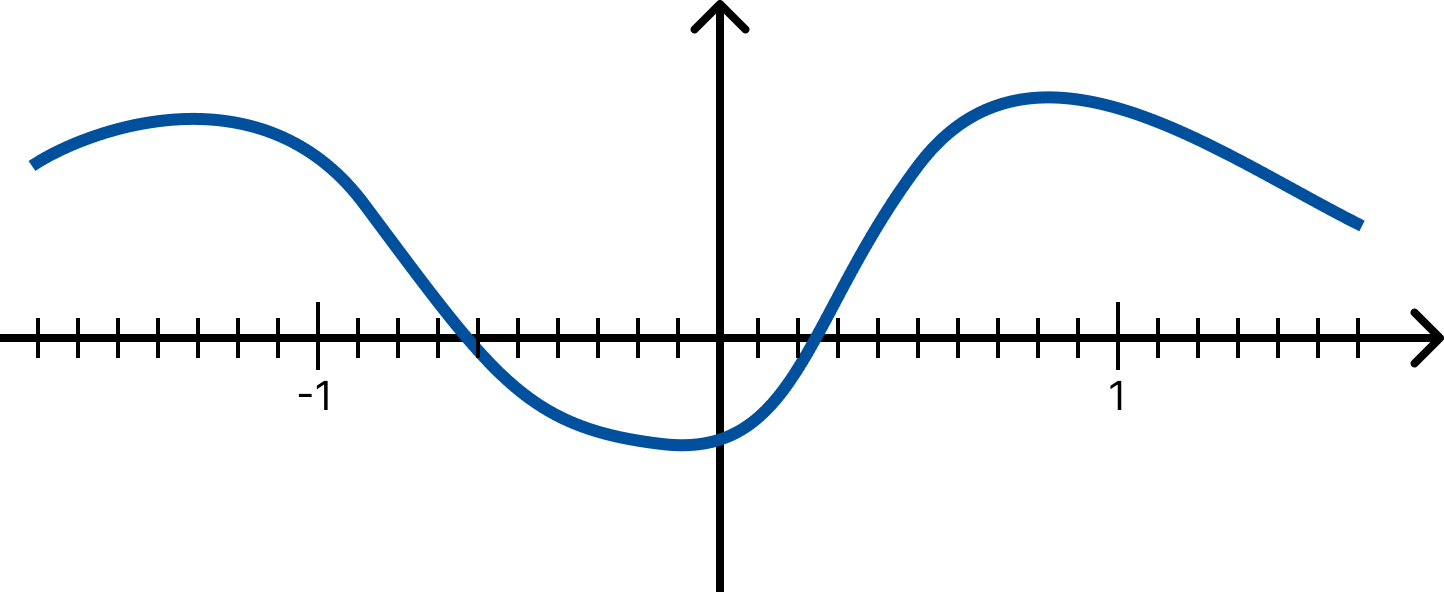

La oss sei at utstyret vårt, til dømes ein mikrofon, tek 10 punktprøver kvart sekund, det vil sei at prøvingsraten er 10Hz (Hz er måleeininga prøver kvar sekund). I dette tilfellet er prøveavstanden $\frac{1}{\text{Prøvingsraten}}=\frac{1}{10\text{Hz}}=0.1\text{s}$. Dette vil sei at kvart tiande sekund leser mikrofonen av kva trykket er. Om vi gjer dette for signalet over får vi følgande bilete:
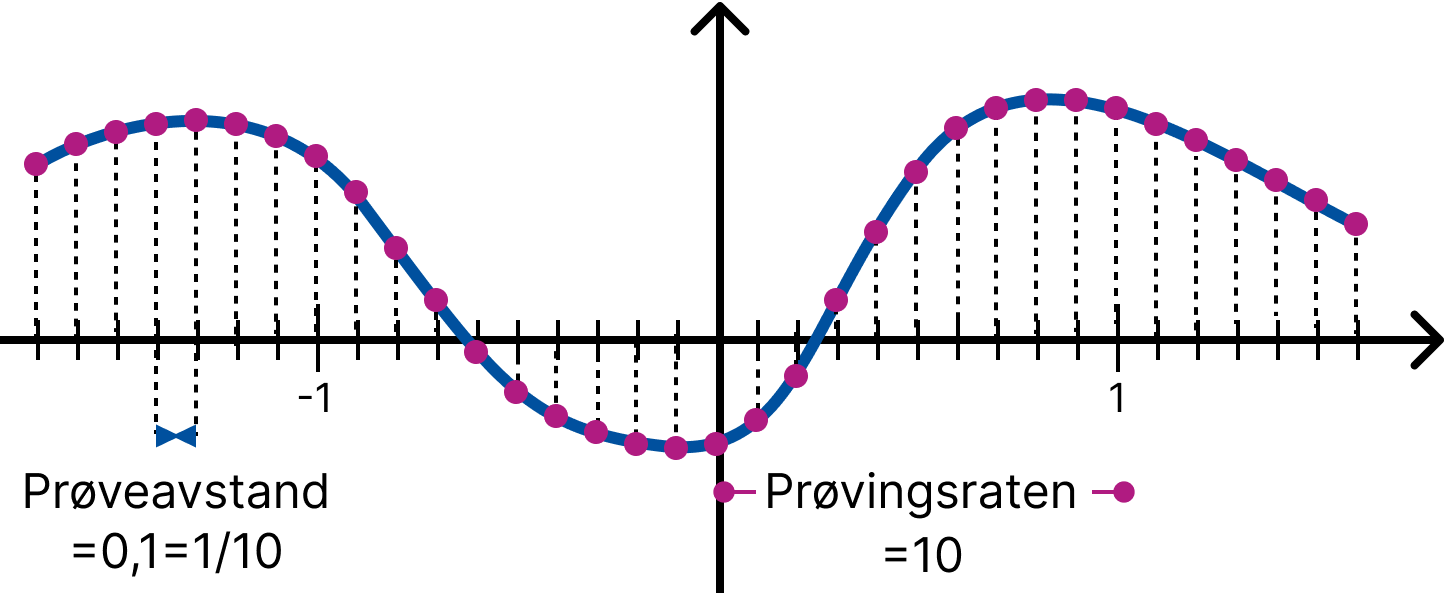


Her vil $y$-verdien til alle de lilla punkta bli lagra i ein vektor. Legg merke med at etter vi har lagra signalet veit vi ikkje kva det originale signalet er mellom prøvene. Når vi skal rekonstruere lufttrykket kjem vi til å måtte fylle igjen desse hola. Ein mogleg måte å gjere dette på er å sei at mellom prøvetakingane er lufttrykket konstant. Det lagrade lydsignalet vil da sjå slik ut:
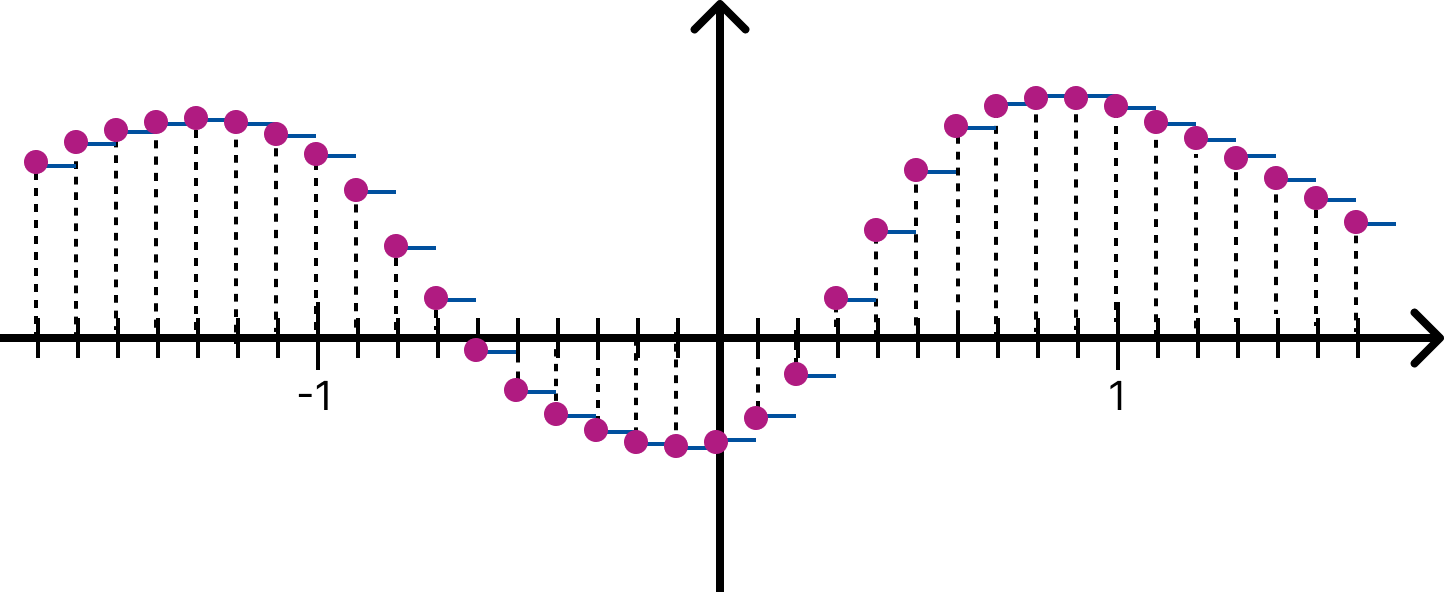

## Eit ekte lydsignal <a class="anchor" id="4-bullet"></a>
La oss nå importere døme som vi snakka om i byrjinga av denne filen. For å handtere og plotte lydsignala, kjem vi til å måtte importere eit par pakkar. Dessutan er det nyttig å kunne høyre korleis det å manipulere frekvensane påverkar lydsignalet, dermed kjem vi til å importere ein konstruktor (ein funksjon som lagar eit klasseobjekt) som gjer at vi kan spele av signala.

In [ ]:
import numpy as np # Pakke for å jobbe med vektorar i python
import matplotlib.pyplot as plt # Pakke for å lage grafar
from IPython.display import Audio # Konstruktor (eng. constructor) som vi kjem til å bruke for å spele av lydfilene

I mappa med dette jupyternotatet følger det også med to lydfiler:
- e_tone.npy
- g_chord.npy.

Endinga .npy refererar til at filene er numpy filer. La oss byrje med å laste inn desse filene.

In [ ]:
# Laste inn lydfilene vi kjem til å bruke:
e_string = np.load("e_tone.npy")
g_chord = np.load("g_chord.npy")

La oss sjå litt nærmare på den første fila:

In [ ]:
e_string

Som vi ser, er dette ein vektor. Om vi ønsker å tolke dette som eit lydsignal må vi oppgje kva enten prøvingsraten eller prøveavstanden er. For lydfiler er prøvingsraten vanlegvis enten $22'050$Hz eller $44'100$Hz. For våre to lydfilene er prøvingsraten på $22'050$Hz. La oss representere dette som ein variabel.

In [ ]:
sampling_rate = 22050 # Prøvingsraten til lydfilene
sampling_period = 1/sampling_rate # Prøveavstanden i lydfilene

### Avspeling av lydsignala
Da har vi all informasjonen vi treng for å høyre på lydsignala.

In [ ]:
# Den mørkaste E strengen på gitar. Trykk på play for å høyre lydsignalet
Audio(e_string, rate=sampling_rate)

In [ ]:
# Eit G-grep på gitar. Trykk på play for å høyre lydsignalet
Audio(g_chord, rate=sampling_rate)

### Test deg sjølv 1
_Du finn løysinga på desse oppgåvene på slutten av dette notatet._

1) Om vi har 30 punktprøver på $2$ sekund. Kva er da prøvingsraten og prøveavstanden?
2) I kodecellen under, adder lydfilene `e_string` og `g_chord`. Spel av den summen av fillene. Kva skjer? 
    _Hugs at for å addere vektorane må begge vektorane ha same lengd._
3) Spel av lydfila `e_string` med prøvingsrate på $44'100$Hz. Korleis samanliknar den nye avspelinga med den originale?

In [ ]:
#### 2)
# Adder e_string og g_chord

# Legg til kode for å spele av lydfila prøvingsrate på $44'100$Hz


In [ ]:
#### 3)
# Spel av lydfila med 


### Plotting av lydsignala
Det vi ønsker å gjere nå er å plotte grafen til lydsignala. Om vi ønsker å bruke `matplotlib` treng vi da ein vektor for $x$-verdiane, eller tida, kor vi tek punktprøvene. Når vi spelar av lyd, er det vanleg å byrje på $0$s, for deretter å gå framover til lengda til lydsignalet $L$. For å lage vektorane med tidspunkta prøvene er tatt på kan vi først finne ut i kor mange sekund lydfila varer, for å detteter dele inn intervallet i like mange deler som vi har punktprøver. Om vi gjer dette for kvart av lydsignala ender vi opp med følgande kode:

In [ ]:
# Tidspunktet prøvene er tatt på for lydfila e_string
number_of_samples_e = e_string.size # Kor mange prøver signalet består av
e_string_duration = number_of_samples_e / sampling_rate # Tida lydsignalet varer

e_sample_times = np.linspace(0, e_string_duration,  number_of_samples_e) # Tidspunktet prøvene er tatt på frå null

Nå kan vi endeleg bruke matplotlib til å plotte lydsignala.

In [ ]:
# Plot av lydfila som inneheld e-strengen
plt.plot(e_sample_times, e_string)
plt.title("E strengen på ein gitar")
plt.xlabel("Tid")
plt.ylabel("Lufttrykk")

plt.show()

Som vi ser frå bilete er det nokså stille dei første ca. 0.3 sekunda. Så slår gitaristen på strengen noko som gjer at lufttrykket får større variasjon. Deretter blir det gradvis stillare. Om du ønsker kan du spille av lydfila igjen og samanlikne det du høyrer og ser i grafen.

Vi kan gjere akkurat det same for lydfila som inneheld G-grepet på gitaren.

In [ ]:
# Tidspunktet prøvene er tatt på for lydfila g_chord
number_of_samples_g = g_chord.size # Kor mange prøver signalet består av
g_chord_duration = number_of_samples_g / sampling_rate # Tida lydsignalet varer

g_sample_times = np.linspace(0, g_chord_duration,  number_of_samples_g) # Tidspunktet prøvene er tatt på frå null

In [ ]:
# Plot av lydfila som inneheld G-grepet
plt.plot(g_sample_times, g_chord)
plt.title("G grep på gitar")
plt.xlabel("Tid")
plt.ylabel("Lufttrykk")

plt.show()

### Test deg sjølv 2
Ta for deg følgande lydsignal.

In [ ]:
frequency = 300 # Frekvensen til signalet målt i svingingar per sekund (Hz)

length_time = 5 # Lengda til signalet i tid.
t = np.linspace(0, 3, sampling_rate * length_time, endpoint=False) # Tidsverdiane vi tar punktprøver på

# Ein rein tone med frekvens på 300Hz
pure_tone = 0.5 * np.sin(2 * np.pi * frequency * t)

1) Plott signalet over på intervallet frå 0 til 0.1.
2) Spill av lydfila. Reine tonar skal høyast ut som høyrselstest ein tar hos legen.

In [ ]:
### 1)
# Plott signalet over på intervallet.


plt.xlim(0, 0.1) # Avgrens plottet til verdiar mellom 0 og 0.1

In [ ]:
### 2)
# Spill av lydfila.


## Den diskrete fouriertransformasjonen <a class="anchor" id="5-bullet"></a>

### Motivasjon
Målet med den diskrete fouriertransformasjonen er å få ut frekvensane frå lydsignalet når vi berre vet kva signalet er i nokre av punkta. La oss sei at vi har eit signal som består av berre ein frekvens, til dømes $f(t)=\sin(2 \pi t)$ kor $t\in [0,1]$. Om tida $t$ er målt i sekund, har $f$ ein frekvens på $\pm1$Hz. Vi veit at vi kan finne denne frekvensen ved å bruke fourierrekkjer. Da har vi nemleg at 

$$\int_0^1\sin(2\pi t)\exp(2\pi j t)\,\mathrm{d}t=\frac{j}{2}\qquad\text{ og }\qquad \int_0^1\sin(2\pi t)\exp(- 2\pi jt)\,\mathrm{d}t=-\frac{j}{2},$$

mens 

$$\int_0^1f( t)\exp(k\times 2\pi j t)\,\mathrm{d}t=\int_0^1\sin( 2\pi t)\exp(k\times 2\pi j t)\,\mathrm{d}t=0,\text{for }k\not = 1.$$

Det vil sei at det berre er frekvensane på $\pm1$Hz som ikkje er $0$.

Om vi berre veit kva verdien til $f$ er i gitte punkter må vi prøve å approksimere integralet

$$\int_0^1f(t)\exp(k\times 2\pi j t)\,\mathrm{d}t$$

kor $k$ er frekvensen vi ønsker å finne.
Dette kan vi gjere med riemannsummer, og om vi tek $100$ punktprøver i intervallet $[0,1]$ blir da formelen

$$\frac{1}{100}\sum_{n=0}^{99}f\left(\frac{n}{100}\right)\exp\left(k\times 2\pi j \frac{n}{100}\right).$$

Det er vanleg å droppe faktoren $\frac{1}{100}$ foran, og dermed blir tilnærminga vår til frekvensane

$$\sum_{n=0}^{99}f\left(\frac{n}{100}\right)\exp\left(k\times 2\pi j \frac{n}{100}\right), \qquad \text{for } k=0,1,2,3,\ldots.$$


### Definisjonen på den diskrete fouriertransformasjonen
Vi er nå klare for å definere den _diskrete fouriertransformasjonen_ (forkorting DFT, eng. discrete Fourier transform).
<div class="alert alert-block alert-warning"><b>Diskrete fouriertransformasjonen:</b> 
La $$\vec{v}=(\vec{v}[0], \vec{v}[1], \vec{v}[2],...,\vec{v}[N-1])$$ være ein vektor med $N$ punktprøver. Da er den diskete fouriertransformasjonen definert som vektoren $\vec{V}$ kor den $k$te verdien er definert som 
    $$\vec{V}[k] = \sum_{n=0}^{N-1}\vec{v}[n]\exp\left(-2\pi j k\frac{n}{N}\right).$$
Vi kjem til å bruke notasjonen $\mathcal{D}(\vec{v})$ for den diskrete fouriertransformasjonen av vektoren $\vec{v}$.

</div>​

Denne versjonen av diskrete fouriertransformasjonen gjev oss berre ut frekvensane når vi er på intervallet $[0,1]$. Om vi ikkje er på dette intervallet må vi skalere tidsverdiane. Vi kjem tilbake til dette når vi byrjar å snakke om korleis bruke DFT i python.

### Døme 1: $f(t)=\sin(2 \pi t)$
Over hadde vi døme med punktprøver av funksjonen $f(t)=\sin(2 \pi t)$. La oss rekne ut DFT. for $N=4$ punktprøver på intervallet $[0,1]$. Vektoren som inneheld punktprøva blir da

$$\vec{v}=(f(0), f(1/4), f(2/4),  f(3/4))=(0, 1,0,-1) .$$

Den diskrete fouriertransformasjonen er gitt med
$$\vec{V}[k]=\sum_{n=0}^3\vec{v}[n]\exp\left(-2\pi j k\frac{n}{4}\right).$$

Reknar vi ut verdiane ein for ein får vi at
$$\vec{V}[0]=\sum_{n=0}^3\vec{v}[n]\exp\left(0\right)=0+1+0-1=0,$$
$$\vec{V}[1]=\sum_{n=0}^3\vec{v}[n]\exp\left(-2\pi j\frac{n}{4}\right)=0+\exp\left(-2\pi j \frac{1}{4}\right)+0-\exp\left(-2\pi j \frac{3}{4}\right)=-2j,$$
$$\vec{V}[2]=\sum_{n=0}^3\vec{v}[n]\exp\left(-4\pi j \frac{n}{4}\right)=0+\exp\left(-4\pi j \frac{1}{4}\right)+0-\exp\left(-4\pi j  \frac{3}{4}\right)=0,$$
$$\vec{V}[3]=\sum_{n=0}^3\vec{v}[n]\exp\left(-6\pi j \frac{n}{4}\right)=0+\exp\left(-6\pi j\frac{1}{4}\right)+0-\exp\left(-6\pi j \frac{3}{4}\right)=2j.$$

Setter vi dette saman har vi da at
$$\mathcal{D}(\vec{v})=\vec{V} = (0, -2j, 0, 2j).$$

Som vi ser, om vi hadde delt på prøvingsraten, som er $4$, hadde vi fått verdiane $(0, -j/2, 0, j/2)$, som er det same vi fekk i motivasjonen over. Her har vi at dei første to verdiane korresponderer til dei positive frekvensane, mens dei siste to verdiane korresponderer til dei negative frekvensane. Dette gjeld alltid. Det vil sei at dei første $N/2$ verdiane vil korrespondere til dei positive frekvensane, mens dei siste $N/2$ verdiane korresponderer til dei negative frekvensane.

### Test deg sjølv 3
Sei at vi har punktprøvene
$$\vec{v}=(1,0, 3).$$
Finn den diskrete fouriertransformasjonen.

### Den diskrete fouriertransformasjonen i python

Om vi har mange punktprøver kan det ta lang tid å finne den diskrete fouriertransformasjonen. Da er det bra at vi kan gjere det i python. For å bruke den må vi importere den fft modulen frå numpy.

In [ ]:
# Last inn fft modulen
from numpy import fft

For å finne den diskrete fouriertransformasjonen kan vi nå bruke funksjonen `fft.fft`.

In [ ]:
# Diskrete fouriertransformasjonen av e_string
dft_e_string = fft.fft(e_string)
dft_e_string

For å finne frekvensane må vi skalere tidsaksen riktig. Dette kan vi gjere med `fft.fftfreq`.

In [ ]:
# Finn frekvensane til e_string
e_freq_sample = fft.fftfreq(e_string.size, 1/sampling_rate)
e_freq_sample

Nå kan vi plotte frekvensane, slik at vi kan sjå kva for nokre tonar lydfila består av. For å gjere plottet lettare å lese, har vi valgt å kutte av plottet med $15'000$Hz. Dette er rett undar det eit meneske kan høyre, som er $20'000$Hz.

In [ ]:
# Plott den reele delen av DFTen
plt.plot(e_freq_sample[:15000], dft_e_string.real[:15000])

# Plott den imaginære delen av DFTen
plt.plot(e_freq_sample[:15000], dft_e_string.imag[:15000])

# Marker grunntona E2 med ein grå stipla linje
plt.vlines(82.41, ymin=-800, ymax=800, colors='gray', linestyle='dotted')

plt.title("Frekvensane til e-strengen")
plt.xlabel("Frekvensane i Hz")
plt.show()

Som vi ser er det fleire spisser i plottet. Dette er frekvensane. Til dømes, er den første spissen frå høgre på $82.41$Hz som i musikkverdenen er kalla er grunntonen til strengen. Denne er markert med ein grå stipla linje. Dei høgare frekvensane er eit heiltalsmultiplum. Dette er ein konsekvens av at tidsutviklinga til ein gitarstreng løysar bølgelikninga som vi studerte tidligare.

### Test deg sjølv 4

Plot frekvensane til lydfila `g_chord`.

### Kor langt er DFT frå fouriertransformasjonen?
Om vi har eit signal så skal den DFT hjelpe oss med å finne frekvensane. La oss sjå kor bra DFT gjer det på signalet 
$$f(x)=\exp(-4x^2).$$

Som vi veit, er fouriertransformasjonene

$$\mathcal{F}(f)(\omega)=\exp(-\omega^2).$$

La oss sjå korleis dette samanliknar med DFT om prøvingsraten er $200$ per tid på intervallet $[0,1]$. Husk frå motivasjonen av DFT at for å få ein riktig samanlikning må vi dele på $200$.

In [ ]:
sampling_rate_error = 200

# x verdiene til x
x = np.linspace(0, 1, sampling_rate_error)

# Signalet
f = np.exp(-4 * x**2)

# DFT av signalet
f_dft = fft.fft(f)

# Normaliser med hensyn på sampling_rate_error
f_dft_normalized = f_dft / sampling_rate_error

# shift plottet slik at det korosponderer til frekvensane
freq_sample = fft.fftfreq(f.size, 1/sampling_rate_error)

# Fouriertransformasjonen av signalet
F = np.exp(- freq_sample**2)

La oss plotte den imiganære delen til fouriertransformasjonen og DFT. Som vi ser, er ikke feilen så stor mellom.

In [ ]:
### Feil i den imaginære delen

# Plott den reele delen av den diskrete fouriertransformasjonen
plt.plot(freq_sample, f_dft_normalized.imag)
plt.plot(freq_sample, F.imag)
plt.plot(freq_sample, np.abs(f_dft_normalized.imag-F.imag))


plt.legend(["Imaginær del av normalisert DFT.", 'Imaginær del fouriertransformasjonen', 'Feilledd'])

plt.title("Frekvensane")
plt.xlabel("Frekvensane i Hz")
plt.show()

Det eneste som gjenstår er den reelle delen DFT og fouriertransformasjonen.

In [ ]:
### Feil i den reelle delen

# Plott den reele delen av den diskrete fouriertransformasjonen
plt.plot(freq_sample, f_dft_normalized.real)
plt.plot(freq_sample, F.real)
plt.plot(freq_sample, np.abs(f_dft_normalized.real-F.real))

plt.legend(["Reell del av normalisert dft.", 'Reell del fouriertransformasjonen', 'Feilledd'])
plt.xlim(-25, 25)


plt.title("Frekvensane")
plt.xlabel("Frekvensane i Hz")
plt.show()

## Invers DFT <a class="anchor" id="6-bullet"></a>

Ein av grunnane til at den diskrete fouriertransformasjonen er så nyttig, er at vi kan gå frem og tilbake mellom punktverdiane og frekvensane. For å gå ifrå frekvensane til punktverdiane, altså motsatt retning av DFT'en, kan vi bruke _invers diskrete fouriertransformasjonen_, forkorta til IDFT. 
<div class="alert alert-block alert-warning"><b>Invers diskrete fouriertransformasjonen:</b> 
La $$\vec{V}=(\vec{V}[0], \vec{V}[1], \vec{V}[2],...,\vec{V}[N-1])$$ være ein vektor med $N$ elementer. Da er den invers diskete fouriertransformasjonen definert som vektoren $\vec{v}$ kor den $k$te verdien er definert som 
    $$\vec{v}[k] =\frac{1}{N} \sum_{n=0}^{N-1}\vec{V}[n]\exp\left(2\pi j k\frac{n}{N}\right).$$
Vi kjem til å bruke notasjonen $\mathcal{D}^{-1}(\vec{V})$ for den inversen av den diskrete fouriertransformasjonen.
</div>​


### Døme 2
Frå døme 1 fikk vi at 
$$\mathcal{D}((0, 1,0,-1))=(0, -2j, 0, 2j).$$

Om dette virkeleg er å gå motsatt veg, bør vi frå døme 1 få tilbake den orginale vektoren ved å bruke IDFT. Med andre ord, bør 

$$\mathcal{D}^{-1}((0, -2j, 0, 2j))=(0, 1,0,-1).$$ 

La oss bekrefte at dette stemmer:
$$\vec{v}[0]=\frac{1}{4}\left(0-2j+0+2j\right)=0,$$

$$\vec{v}[1]=\frac{1}{4}\left(0-2j\exp\left(2\pi j\frac{1}{4}\right)+0\exp\left(2\pi j\frac{2}{4}\right)+2j\exp\left(2\pi j\frac{3}{4}\right)\right)=\frac{1}{4}\left(-2j\exp\left(\pi j\frac{1}{2}\right)+2j\exp\left(\pi j\frac{3}{2}\right)\right)=1,$$

$$\vec{v}[2]=\frac{1}{4}\left(0-2j\exp\left(4\pi j\frac{1}{4}\right)+0\exp\left(4\pi j\frac{2}{4}\right)+2j\exp\left(4\pi j\frac{3}{4}\right)\right)=\frac{1}{4}\left(-2j\exp\left(\pi j\right)+2j\exp\left(3\pi j\right)\right)=0,$$

og

$$\vec{v}[3]=\frac{1}{4}\left(0-2j\exp\left(6\pi j\frac{1}{4}\right)+0\exp\left(6\pi j\frac{2}{4}\right)+2j\exp\left(6\pi j\frac{3}{4}\right)\right)=\frac{1}{4}\left(-2j\exp\left(\pi j\frac{3}{2}\right)+2j\exp\left(\pi j\frac{9}{2}\right)\right)=-1.$$


### Invers diskrete fouriertransformasjonen med python

Som med DFT har også IDFT ein eigen pythonfunksjon. Denne ligg også i `fft` modulen i numpy og heitar `fft.ifft`.

In [ ]:
v = np.array([1, 2, 3, 4])

# Invers diskrete fouriertransformasjonen
v_idft = fft.ifft(v)
v_idft

For å gå tilbake til den orginale vektoren kan vi bruke  `fft.fft` funksjonen igjen.

In [ ]:
v_idft_dft = fft.fft(v_idft)
v_idft_dft

Du lurar kanskje på kvifor modulen heitar fft og ikkje dft? Grunnen er at fft står for "fast fourier transform". Dette viser til algoritmen som blir brukt er, som namnet tilseier, ein mykje raskare algoritme for å berekne den diskrete fouriertransformasjonen.

## Syklisk konvolusjon <a class="anchor" id="7-bullet"></a>

Vi vet at konvolusjonen og fouriertransformasjonen oppretholder

$$\mathcal{F}\{f\ast g\}(\omega)=\mathcal{F}\{f\}(\omega)\mathcal{F}\{g\}(\omega).$$

Den diskrete fouriertransformasjonen opprettholder den samme relasjonene med hensyn på den _sykliske konvolusjonen_ $\circledast$. Det vil si at 
$$\mathcal{D}(f\circledast g)=\mathcal{D}(f)\mathcal{D}(g).$$

In [ ]:
# Importer konvolusjonen
from scipy.ndimage import convolve

v = np.array([1, 2, 3])
w = np.array([1, 0, 2])

# Syklisk konvolusjon med python
convolve(v, w, mode='wrap')

## Høg- og lågpassfilter  <a class="anchor" id="8-bullet"></a>
Ein vanleg måte å manipulere eit lydsignal er å bruke eit filter. For oss kjem eit filter til å være å først å bruke DFT, deretter manipulere frekvensane, for å til slutt å gå tilbake med IDFT. Dette er vist i figuren under:
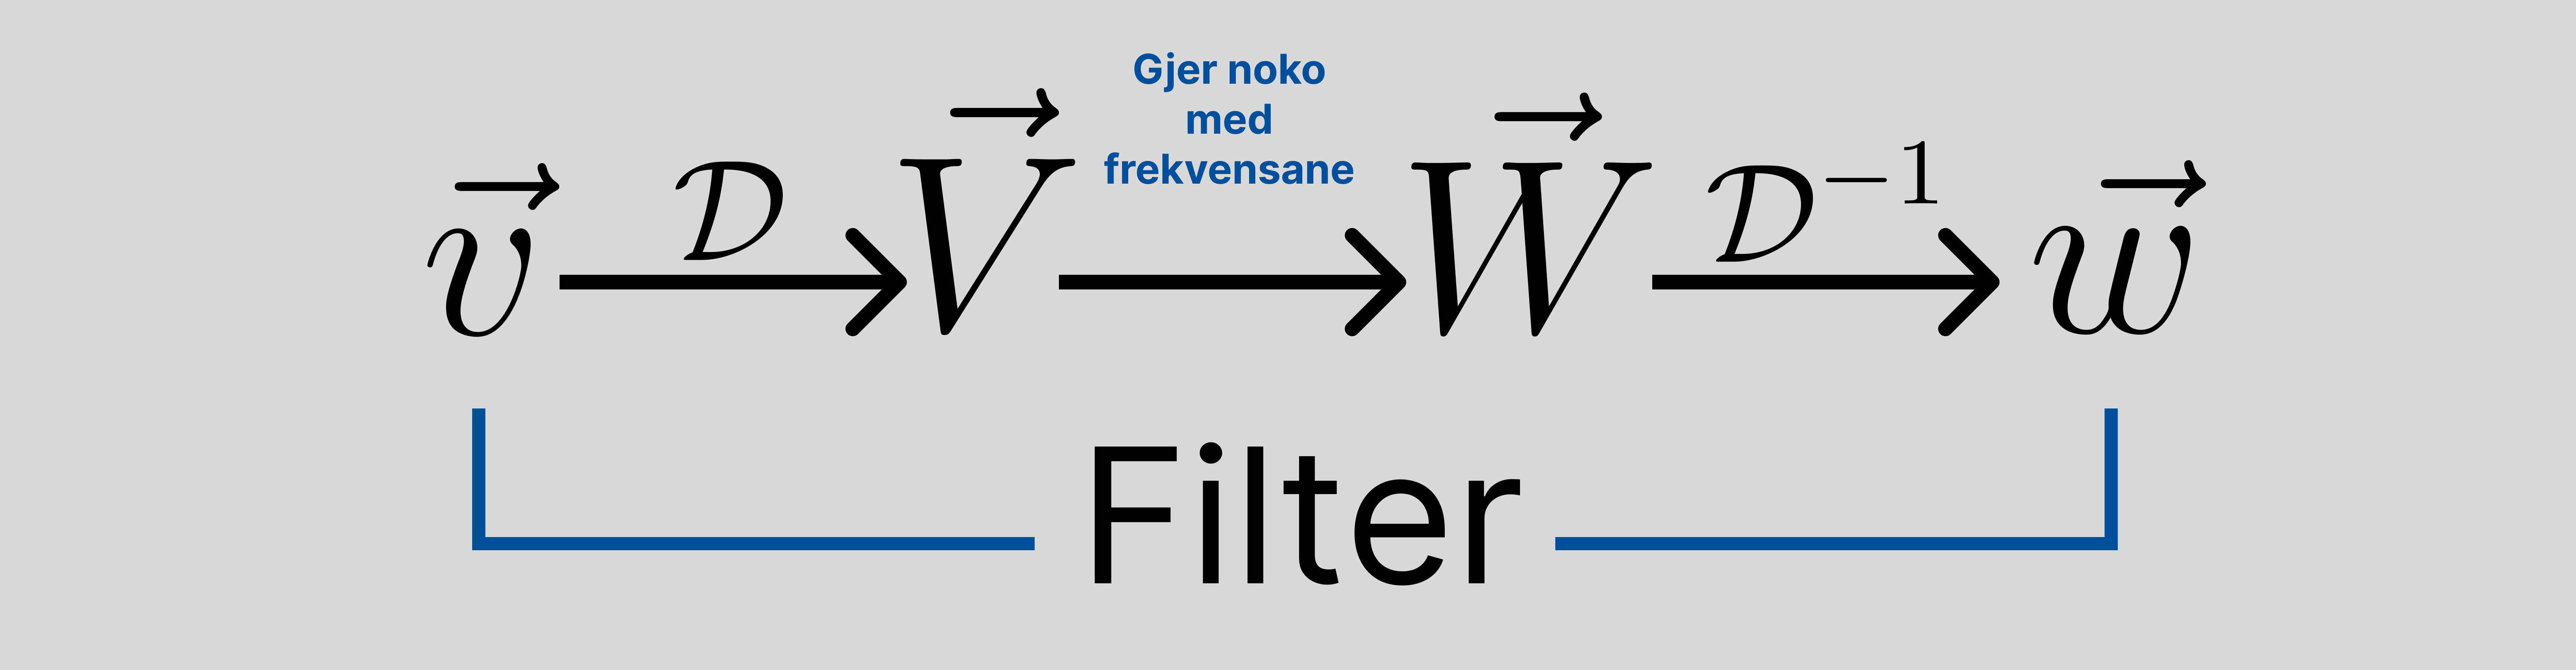
Kva for ein type filter det er heng saman med kva vi gjer med frekvensane. Filtera blir blant anna brukt til å fjerne støy,  Videre kjem vi til å sjå på to døme på filter, nemleg høgpassfilter og lågpassfilter.


### Høgpassfilter
Eit høgpassfilter let berre dei høge frekvensane passere. Dei låge frekvensane blir derimot enten satt til null (eller veldig nærme null). Kor vi kuttar av frekvensane er kalla avkuttingspunktet. Den lettaste måten å lage eit høgpassfilter er å sette alle frekvensane under avkuttingspunktet lik null. Det vil sei at om avkuttingspunktet er $600$Hz, vil vi ikkje gjere noko med frekvensane over $600$Hz, mens dei under vil bli satt til $0$. La oss gjer eit døme i python med `e_string`.

In [ ]:
# Avspilling av det orginale signalet
Audio(e_string, rate=sampling_rate)

Om vi tar DFT får vi følgende resultat:

In [ ]:
# DFT av signalet
dft_e = fft.fft(e_string)

# Frekvensane til signalet
dft_e_freq = fft.fftfreq(dft_e.size, 1/sampling_rate)

### Plot Frekvensane

# Plott den reele delen av den diskrete fouriertransformasjonen
plt.plot(e_freq_sample[:15000], dft_e.real[:15000])

# Plott den imaginære delen av den diskrete fouriertransformasjonen
plt.plot(e_freq_sample[:15000], dft_e.imag[:15000])

plt.title("Frekvensane til e-strengen før filteret")
plt.xlabel("Frekvensane i Hz")
plt.show()

La oss sette alle frekvensane som er mindre i absoluttverdi enn $600$Hz til å være $0$.

In [ ]:
# Sett verdien i alle frekvensane under 600Hz til null
dft_e[np.abs(e_freq_sample) < 600] = 0

### Plot Frekvensane

# Plott den reele delen av den diskrete fouriertransformasjonen
plt.plot(e_freq_sample[:15000], dft_e.real[:15000])

# Plott den imaginære delen av den diskrete fouriertransformasjonen
plt.plot(e_freq_sample[:15000], dft_e.imag[:15000])

# Marker avkuttingsfrekvensen med ein grå stipla linje
plt.vlines(600, ymin=-120, ymax=120, colors='gray', linestyle='dotted')

plt.title("Frekvensane til e-strengen etter høgpassfilteret")
plt.xlabel("Frekvensane i Hz")
plt.show()

Det siste vi må gjorde er å gå tilbake med IDFT for å få en ny lydfil.

In [ ]:
# Ta IDFT av det nye signalet
e_string_highpass = fft.ifft(dft_e)

# Avspeling av signalet etter filteret
Audio(e_string_highpass.real, rate=sampling_rate)

Om du samanlignar `e_string_highpass` med det orginale lydfilen hører vi at det berre er høge frekvensar i lydfilen, siden alle dei låge frekvensane er null.

### Test deg sjølv 5
Bruk eit høgpassfilter med avkuttingsfrekvens på $500$Hz på lydfila `g_chord`.

In [ ]:
# DFT av signalet
dft_g = fft.fft(g_chord)

# Frekvensane til signalet
dft_g_freq = fft.fftfreq(dft_g.size, 1/sampling_rate)

# Sett verdien i alle frekvensane under 500Hz til null


# Ta IDFT av det nye signalet


# Avspeling av signalet etter filteret


### Lågpassfilter
Lågpassfilter lar kun frekvensane under avkuttingsfrekvensen passere. La oss fjerne alle frekvensane over $800$Hz.

In [ ]:
# DFT av signalet
dft_e = fft.fft(e_string)

# Sett verdien i alle frekvensane over 800Hz til null
dft_e[np.abs(e_freq_sample) > 800] = 0

### Plot Frekvensane

# Plott den reele delen av den diskrete fouriertransformasjonen
plt.plot(e_freq_sample[:15000], dft_e.real[:15000])

# Plott den imaginære delen av den diskrete fouriertransformasjoen
plt.plot(e_freq_sample[:15000], dft_e.imag[:15000])

# Marker avkuttingsfrekvensen med ein grå stipla linje
plt.vlines(800, ymin=-600, ymax=600, colors='gray', linestyle='dotted')

plt.title("Frekvensane til e-strengen etter lågpassfilteret")
plt.xlabel("Frekvensane i Hz")
plt.show()

Da gjenstår det berre å gå tilbake med IDFT.

In [ ]:
# Ta IDFT av det nye signalet
e_string_lowpass = fft.ifft(dft_e)

# Avspeling av signalet etter filteret
Audio(e_string_lowpass.real, rate=sampling_rate)

### Test deg sjølv 6
Bruk eit høgpassfilter med avkuttingsfrekvens på $400$Hz på lydfila `g_chord`.

In [ ]:
# DFT av signalet
dft_g = fft.fft(g_chord)

# Frekvensane til signalet
dft_g_freq = fft.fftfreq(dft_g.size, 1/sampling_rate)

# Sett verdien i alle frekvensane over  400Hz til null


# Ta idft av det nye signalet


# Avspeling av signalet etter filteret


## Løysing på test deg sjølv<a class="anchor" id="9-bullet"></a>

### Test deg sjølv 1
1) Prøvingsraten er $30/2=15$. Prøveavstanden er $\frac{1}{15}$.
2) I kodecellen under, adder lydfilene `e_string` og `g_chord`. Spel av den summen av fillene. Kva skjer? 

In [ ]:
# Tar summen av lydfilene
sum_of_sounds = e_string + g_chord[0:e_string.size]

# Som vi høyrer, resulterer summen av filene at det høyres ut som at begge filene blir spilt av samtidig
Audio(sum_of_sounds, rate=sampling_rate)

3) Spel av lydfila `e_string` med prøvingsrate på $44'100$Hz. Korleis samanliknar den nye avspillinga med den orginale?

In [ ]:
# Som vi høyrer blir tonane lysare. 
# Dette er grunna at alle frekvensane blir dobla når speler av lydfila med dobbel hastigheit
Audio(e_string, rate=44100)

### Test deg sjølv 2

In [ ]:
frequency = 300 # Frekvensen til signalet målt i svingingar per sekund (Hz)

length_time = 5 # Lengda til signalet i tid.
t = np.linspace(0, 3, sampling_rate * length_time, endpoint=False) # Tidsverdiane vi tar punktprøver på

# Ein rein tone med frekvens på 300Hz
pure_tone = 0.5 * np.sin(2 * np.pi * frequency * t)

### 1)
# Plott signalet over på intervallet.
plt.plot(t, pure_tone)
plt.xlabel("Tid")
plt.ylabel("Lufttrykk")
plt.xlim(0, 0.1)

plt.show()

In [ ]:
### 2)
# Spill av lydfila.
Audio(pure_tone, rate=sampling_rate)

### Test deg sjølv 3


Vi har at for $k=0$ har vi at
$$\vec{V}[0]=\sum_{n=0}^2\vec{v}[n]\exp\left(-2\pi j \cdot 0\cdot\frac{n}{3}\right)=\vec{v}[0]+\vec{v}[1]+\vec{v}[2]=1+0+3=4,$$ for $k=1$ har vi at
\begin{align}\vec{V}[1]&=\sum_{n=0}^2\vec{v}[n]\exp\left(-2\pi j \cdot 1\cdot\frac{n}{3}\right)\\
&=\vec{v}[0]\exp\left(0\right)+\vec{v}[1]\exp\left(-2\pi j \frac{1}{3}\right)+\vec{v}[2]\exp\left(-2\pi j \frac{2}{3}\right)\\&=1+0+3\exp\left(-\frac{4\pi j}{3}\right)=-\frac{1}{2}+\frac{3\sqrt{3}}{2}j
\end{align}
tilsist har vi at
\begin{align}\vec{V}[2]&=\sum_{n=0}^2\vec{v}[n]\exp\left(-2\pi j \cdot 2\cdot\frac{n}{3}\right)\\
&=\vec{v}[0]\exp\left(0\right)+\vec{v}[1]\exp\left(-2\pi j \frac{2}{3}\right)+\vec{v}[2]\exp\left(-2\pi j \frac{4}{3}\right)\\&=1+0+3\exp\left(-\frac{8\pi j}{3}\right)=-\frac{1}{2}-\frac{3\sqrt{3}}{2}j.
\end{align}

Dermed har vi at 
$$\vec{V}=\left(4,-\frac{1}{2}+\frac{3\sqrt{3}}{2}j, -\frac{1}{2}-\frac{3\sqrt{3}}{2}j \right).$$

### Test deg sjølv 4

In [ ]:
# Diskrete fouriertransformasjonen av g_chord
dft_g_chord = fft.fft(g_chord)

# Finn frekvensane til g_chord
g_freq_sample = fft.fftfreq(g_chord.size, 1/sampling_rate)

# Plott den reele delen av den diskrete fouriertransformasjonen
plt.plot(g_freq_sample[:15000], dft_g_chord.real[:15000])

# Plott den imaginære delen av den diskrete fouriertransformasjonen
plt.plot(g_freq_sample[:15000], dft_g_chord.imag[:15000])

plt.title("Frekvensane til eit G-grep")
plt.xlabel("Frekvensane i Hz")
plt.show()

### Test deg sjølv 5

In [ ]:
# DFT av signalet
dft_g = fft.fft(g_chord)

# Frekvensane til signalet
dft_g_freq = fft.fftfreq(dft_g.size, 1/sampling_rate)

# Sett verdien i alle frekvensane under 500Hz til null
dft_g[dft_g_freq < 500] = 0

# Ta IDFT av det nye signalet
g_chord_highpass = fft.ifft(dft_g)

# Avspeling av signalet etter filteret
Audio(g_chord_highpass.real, rate=sampling_rate)

### Test deg sjølv 6

In [ ]:
# DFT av signalet
dft_g = fft.fft(g_chord)

# Frekvensane til signalet
dft_g_freq = fft.fftfreq(dft_g.size, 1/sampling_rate)

# Sett verdien i alle frekvensane over 400Hz til null
dft_g[dft_g_freq > 400] = 0

# Ta IDFT av det nye signalet
g_chord_lowpass = fft.ifft(dft_g)

# Avspeling av signalet etter filteret
Audio(g_chord_lowpass.real, rate=sampling_rate)